<a href="https://colab.research.google.com/github/MahankaliShruthi/Human-activation-classification/blob/main/human_activation_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
no_of_images=sum([len(files) for r, d, files in os.walk("/content/drive/My Drive/HumanActionClassification/")])
                                                        

In [ ]:
print(no_of_images)

910


In [ ]:
X=np.zeros((no_of_images,224,224,3))
Y=np.zeros((no_of_images,7))
count=0
for i in range(1,8):
  for r,d, files in os.walk("/content/drive/My Drive/HumanActionClassification/"+str(i)):
    for file in files:
      X[count]=cv2.resize(cv2.imread("/content/drive/My Drive/HumanActionClassification/"+str(i)+"/"+file),dsize=(224,224),interpolation =cv2.INTER_CUBIC)
      Y[count][i-1]=1
      count +=1
      print(count)
X=X[:count,:,:,:]
Y=Y[:count,:]
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


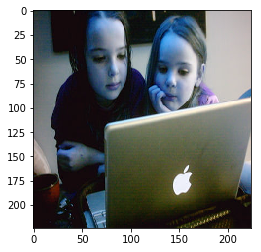

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0]/np.max(X[0]))
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
def CNN(x_train,x_test,y_train,y_test,learning_rate=0.001):
  x=tf.placeholder(tf.float32,[None,224,224,3])
  y=tf.placeholder(tf.float32,[None,7])
  initializer = tf.contrib.layers.xavier_initializer()
  W1 = tf.Variable(initializer([5,5,3,16]), name="W1")
  b1 = tf.Variable(initializer([16]), name="b1")
  z1 = tf.nn.relu(tf.nn.conv2d(x , W1, [1, 1, 1, 1], padding='SAME') + b1)
  a1 = tf.nn.max_pool(z1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding="SAME")
  W2 = tf.Variable(initializer([5,5,16,32]), name="W2")
  b2 = tf.Variable(initializer([32]), name="b2")
  z2 = tf.nn.relu(tf.nn.conv2d(a1, W2, [1, 1, 1, 1], padding='SAME') + b2)
  a2 = tf.nn.max_pool(z2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding="SAME")
  W3 = tf.Variable(initializer([5, 5, 32, 64]), name='W3')
  b3 = tf.Variable(initializer([64]), name='b3')
  z3 = tf.nn.relu(tf.nn.conv2d(a2 , W3, [1, 1, 1, 1], padding='SAME') + b3)
  a3 = tf.nn.max_pool(z3, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding="SAME")
  W4 = tf.Variable(initializer([5, 5, 64, 128]), name='W4')
  b4 = tf.Variable(initializer([128]), name='b4')
  z4 = tf.nn.relu(tf.nn.conv2d(a3 , W4, [1, 1, 1, 1], padding='SAME') + b4)
  a4 = tf.nn.max_pool(z4, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding="SAME")
  W5 = tf.Variable(initializer([5, 5, 128, 256]), name='W5')
  b5 = tf.Variable(initializer([256]), name='b5')
  z5 = tf.nn.relu(tf.nn.conv2d(a4 , W5, [1, 1, 1, 1], padding='SAME') + b5)
  a5 = tf.nn.max_pool(z5, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding="SAME")
  flatten = tf.reshape(a5, [-1, 7*7*256])
  W6 = tf.Variable(initializer([7*7*256,49]), name="W6")
  b6 = tf.Variable(initializer([49]), name="b6")
  z6 = tf.matmul(flatten, W6) + b6
  a6 = tf.nn.relu(z6)
  W7 = tf.Variable(initializer([49, 7]), name="W7")
  b7 = tf.Variable(initializer([7]), name="b7")
  z7 = tf.matmul(a6, W7) + b7
  a7 = tf.nn.sigmoid(z7)
  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z7, labels = y))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(a7,1),tf.argmax(y,1)), tf.float32))
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_size = 64
    total_batch = x_train.shape[0]//batch_size
    for epoch in range(1000):
        avg_cost = 0
        for i in range(total_batch):
            _, c = sess.run([optimizer, loss], feed_dict={x:x_train[i*batch_size:(i+1)*batch_size], y:y_train[i*batch_size:(i+1)*batch_size]})
            avg_cost += c/total_batch
        train_accuracy = sess.run(accuracy, feed_dict={x:x_train, y:y_train})
        test_accuracy = sess.run(accuracy, feed_dict={x:x_test, y:y_test})
        print("Epoch:", (epoch+1))
        print("Cost:", avg_cost)
        print("Train accuracy:", train_accuracy)
        print("Test accuracy:", test_accuracy)
  

In [ ]:
CNN(x_train,x_test,y_train,y_test)

Epoch: 1
Cost: 5.920479135079818
Train accuracy: 0.1717033
Test accuracy: 0.24175824
Epoch: 2
Cost: 0.4372939982197501
Train accuracy: 0.17445055
Test accuracy: 0.24725275
Epoch: 3
Cost: 0.4288281527432529
Train accuracy: 0.23214285
Test accuracy: 0.26373628
Epoch: 4
Cost: 0.41417543183673505
Train accuracy: 0.17445055
Test accuracy: 0.24725275
Epoch: 5
Cost: 0.4101039821451361
Train accuracy: 0.21428572
Test accuracy: 0.24725275
Epoch: 6
Cost: 0.39885083382779896
Train accuracy: 0.28983516
Test accuracy: 0.2967033
Epoch: 7
Cost: 0.38541746139526367
Train accuracy: 0.32554945
Test accuracy: 0.30769232
Epoch: 8
Cost: 0.37083338336511096
Train accuracy: 0.34752747
Test accuracy: 0.30769232
Epoch: 9
Cost: 0.3633040894161571
Train accuracy: 0.35851648
Test accuracy: 0.3021978
Epoch: 10
Cost: 0.35118617794730445
Train accuracy: 0.42582417
Test accuracy: 0.34615386
Epoch: 11
Cost: 0.34010327675125823
Train accuracy: 0.44505495
Test accuracy: 0.32967034
Epoch: 12
Cost: 0.3257141384211453
Trai